In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [14]:
data=pd.read_csv('IMDB Dataset.csv')

In [15]:
data

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## First Preview

### Duplicated Data

In [5]:
data.duplicated().sum()

418

In [6]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

### Missing values

In [7]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

### Descriptive Analysis

In [8]:
data.describe()

review sentiment
count                                               49582     49582
unique                                              49582         2
top     One of the other reviewers has mentioned that ...  positive
freq                                                    1     24884

### Distribution of "Sentiment"

In [9]:
data['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

## Preprocessing

### Normalisation 

In [10]:
import string
import re 

def clean_text_round1(text):
    #Lowercase
    text=text.lower()

    #remove punctuation
    text.translate(str.maketrans("","",string.punctuation))

    # Supprimer les URL
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Supprimer les caractères spéciaux, les chiffres et les ponctuations
    text= re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Supprimer les espaces multiples et les espaces en début/fin de chaîne
    text = re.sub(r'\s+', ' ', text).strip()

    return text

round1= lambda x: clean_text_round1(x)

In [11]:
data['review'] = data['review'].apply(clean_text_round1)

In [12]:
data

review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production br br the filmin...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically there s a family where a little boy ...  negative
4      petter mattei s love in the time of money is a...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  i m going to have to disagree with the previou...  negative
49999  no one expects the star trek movies to be high...  negative

[49582 rows x 2 columns]

### Removing stop words & contractions

In [18]:
import nltk.corpus
nltk.download("stopwords")
from nltk.corpus import stopwords

not_stop_words=['no','not']
stop_words=stopwords.words("english")
stop_words_new=[x for x in stop_words if x not in not_stop_words]


def remove_stop_words (df):

    df["review_clean"]=df["review"].apply(
    lambda x: " ".join([word for word in x.split() if word not in (stop_words_new)]) )
    return df


[nltk_data] Downloading package stopwords to C:\Users\Fatima-Ezzahra
[nltk_data]     BOUR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [14]:
data=remove_stop_words(data)

In [16]:
import pandas as pd
import contractions

def expand_contractions(text):

    if pd.isna(text):
        return text
    return contractions.fix(text)

data['review_clean'] = data['review_clean'].apply(expand_contractions)

In [17]:
data

review sentiment  \
0      one of the other reviewers has mentioned that ...  positive   
1      a wonderful little production br br the filmin...  positive   
2      i thought this was a wonderful way to spend ti...  positive   
3      basically there s a family where a little boy ...  negative   
4      petter mattei s love in the time of money is a...  positive   
...                                                  ...       ...   
49995  i thought this movie did a down right good job...  positive   
49996  bad plot bad dialogue bad acting idiotic direc...  negative   
49997  i am a catholic taught in parochial elementary...  negative   
49998  i m going to have to disagree with the previou...  negative   
49999  no one expects the star trek movies to be high...  negative   

                                            review_clean  
0      one reviewers mentioned watching oz episode ho...  
1      wonderful little production br br filming tech...  
2      thought wonderful way spend time hot summer we...  
3      basically family little boy jake thinks zombie...  
4      petter mattei love time money visually stunnin...  
...                                                  ...  
49995  thought movie right good job creative original...  
49996  bad plot bad dialogue bad acting idiotic direc...  
49997  catholic taught parochial elementary schools n...  
49998  going disagree previous comment side maltin on...  
49999  no one expects star trek movies high art fans ...  

[49582 rows x 3 columns]

### Lemmatization

In [18]:
import pandas as pd
import spacy

nlp = spacy.load('en_core_web_sm')

def lemmatize_comment(comment):
    doc = nlp(comment)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return ' '.join(lemmatized_tokens)

data['review_lemmatized'] = data['review_clean'].apply(lemmatize_comment)

In [19]:
data

review sentiment  \
0      one of the other reviewers has mentioned that ...  positive   
1      a wonderful little production br br the filmin...  positive   
2      i thought this was a wonderful way to spend ti...  positive   
3      basically there s a family where a little boy ...  negative   
4      petter mattei s love in the time of money is a...  positive   
...                                                  ...       ...   
49995  i thought this movie did a down right good job...  positive   
49996  bad plot bad dialogue bad acting idiotic direc...  negative   
49997  i am a catholic taught in parochial elementary...  negative   
49998  i m going to have to disagree with the previou...  negative   
49999  no one expects the star trek movies to be high...  negative   

                                            review_clean  \
0      one reviewers mentioned watching oz episode ho...   
1      wonderful little production br br filming tech...   
2      thought wonderful way spend time hot summer we...   
3      basically family little boy jake thinks zombie...   
4      petter mattei love time money visually stunnin...   
...                                                  ...   
49995  thought movie right good job creative original...   
49996  bad plot bad dialogue bad acting idiotic direc...   
49997  catholic taught parochial elementary schools n...   
49998  going disagree previous comment side maltin on...   
49999  no one expects star trek movies high art fans ...   

                                       review_lemmatized  
0      one reviewer mention watch oz episode hook rig...  
1      wonderful little production br br film techniq...  
2      think wonderful way spend time hot summer week...  
3      basically family little boy jake think zombie ...  
4      petter mattei love time money visually stunnin...  
...                                                  ...  
49995  think movie right good job creative original f...  
49996  bad plot bad dialogue bad act idiotic direct a...  
49997  catholic teach parochial elementary school nun...  
49998  go disagree previous comment side maltin one s...  
49999  no one expect star trek movie high art fan exp...  

[49582 rows x 4 columns]

In [20]:
columns_to_drop = ['review', 'review_clean']
data = data.drop(columns=columns_to_drop)

### Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['sentiment']= encoder.fit_transform(data['sentiment'])

In [48]:
data.to_pickle("pickles/data_cleaned.pkl")

### Tokenization

In [2]:
data= pd.read_pickle('pickles/data_cleaned.pkl')

In [3]:
data

sentiment                                  review_lemmatized
0              1  one reviewer mention watch oz episode hook rig...
1              1  wonderful little production br br film techniq...
2              1  think wonderful way spend time hot summer week...
3              0  basically family little boy jake think zombie ...
4              1  petter mattei love time money visually stunnin...
...          ...                                                ...
49995          1  think movie right good job creative original f...
49996          0  bad plot bad dialogue bad act idiotic direct a...
49997          0  catholic teach parochial elementary school nun...
49998          0  go disagree previous comment side maltin one s...
49999          0  no one expect star trek movie high art fan exp...

[49582 rows x 2 columns]

In [4]:
### Splitting the data
from sklearn.model_selection import train_test_split

x= data['review_lemmatized']
y= data['sentiment']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [5]:
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()

print("Distribution de y_train:")
print(train_counts)

print("\nDistribution de y_test:")
print(test_counts)

Distribution de y_train:
sentiment
1    17470
0    17237
Name: count, dtype: int64

Distribution de y_test:
sentiment
0    7461
1    7414
Name: count, dtype: int64


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)


In [7]:
# Récupérer le dictionnaire de mapping des mots vers des entiers
tokenizer.word_index

{'br': 1,
 'movie': 2,
 'film': 3,
 'not': 4,
 'one': 5,
 'see': 6,
 'make': 7,
 'like': 8,
 'good': 9,
 'well': 10,
 'get': 11,
 'time': 12,
 'character': 13,
 'watch': 14,
 'go': 15,
 'bad': 16,
 'story': 17,
 'no': 18,
 'would': 19,
 'even': 20,
 'really': 21,
 'think': 22,
 'show': 23,
 'scene': 24,
 'look': 25,
 'great': 26,
 'much': 27,
 'say': 28,
 'know': 29,
 'people': 30,
 'end': 31,
 'also': 32,
 'first': 33,
 'way': 34,
 'love': 35,
 'take': 36,
 'give': 37,
 'play': 38,
 'thing': 39,
 'come': 40,
 'find': 41,
 'man': 42,
 'could': 43,
 'act': 44,
 'seem': 45,
 'life': 46,
 'two': 47,
 'plot': 48,
 'work': 49,
 'many': 50,
 'actor': 51,
 'want': 52,
 'year': 53,
 'never': 54,
 'little': 55,
 'ever': 56,
 'try': 57,
 'feel': 58,
 'still': 59,
 'part': 60,
 'something': 61,
 'director': 62,
 'old': 63,
 'use': 64,
 'back': 65,
 'lot': 66,
 'real': 67,
 'guy': 68,
 'funny': 69,
 'woman': 70,
 'performance': 71,
 'though': 72,
 'another': 73,
 'actually': 74,
 'big': 75,
 'cast

In [8]:
# Get the total number of documents used to train the tokenizer
tokenizer.document_count

34707

In [9]:
X_train.shape

(34707,)

In [10]:
# Convert texts to sequences of integers for the training and test sets
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [11]:
# padding the data
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train=pad_sequences(X_train,maxlen=100,padding="post")
X_test=pad_sequences(X_test,maxlen=100,padding="post")

In [12]:
X_train[1]

array([  115,   731,    33,   169,   144,     9,   169,   797,     2,
        2366,  9737,  4459,   573,  1068,    28,    27,   503,     1,
           1,   322,    44,     4,    26,   631,   266,    76,    10,
        6291,   183,   107,  1490,    13,   143,   279,  7053,   102,
          24,  1683,   107,     1,     1,    21,  1859,  2669,   642,
         171,  8130,   650,   451,    32,  1050,  2325,   471,   584,
          13,   588,   629,    21,    11,    22,  1062,     2,   127,
          22,    10,  8535,  3936,     1,     1, 44629,  1074,     9,
         319,    19,   313,   200,   203,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])

In [13]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [14]:
#Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(tokenizer.word_index) + 1

vocab_length

74274

In [15]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [16]:
embedding_matrix.shape

(74274, 100)

## Modeling

### CNN

In [17]:
from keras.layers import Conv1D

In [25]:
# Neural Network architecture
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GlobalMaxPooling1D, Embedding

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=100, trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))

In [32]:
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(cnn_model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 100)            │       7,427,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 96, 128)             │          64,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,491,657 (28.58 MB)

 Trainable params: 64,257 (251.00 KB)

 Non-trainable params: 7,427,400 (28.33 MB)

None


In [33]:
# Model training

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.9986 - loss: 0.0137 - val_accuracy: 0.8408 - val_loss: 0.5871
Epoch 2/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.9987 - loss: 0.0115 - val_accuracy: 0.8413 - val_loss: 0.6173
Epoch 3/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.9998 - loss: 0.0073 - val_accuracy: 0.8405 - val_loss: 0.6576
Epoch 4/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.8391 - val_loss: 0.6767
Epoch 5/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8422 - val_loss: 0.6918
Epoch 6/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8433 - val_loss: 0.7181
Epoch 7/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - accuracy: 1.0000 - loss: 6.8219e-04 - val_accuracy: 0.8428 - val_loss: 0.7579
Epoch 8/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - accuracy: 1.00

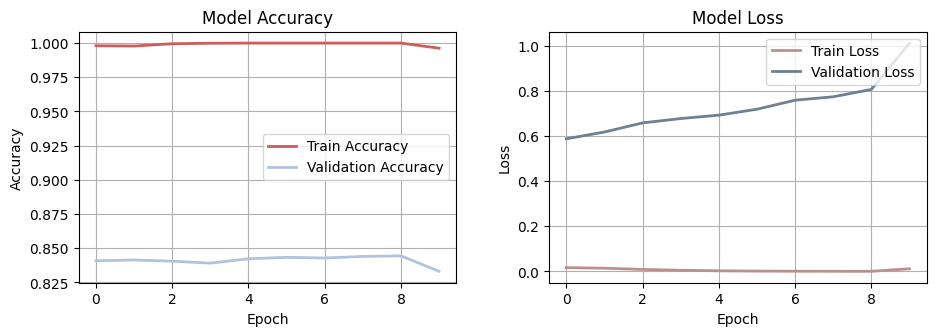

In [54]:
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first graph (Model Accuracy)
axs[0].plot(cnn_model_history.history['accuracy'], label='Train Accuracy', color='indianred', linewidth=2)
axs[0].plot(cnn_model_history.history['val_accuracy'], label='Validation Accuracy', color='lightsteelblue', linewidth=2)
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Plot the second graph (Model Loss)
axs[1].plot(cnn_model_history.history['loss'], label='Train Loss', color='rosybrown', linewidth=2)
axs[1].plot(cnn_model_history.history['val_loss'], label='Validation Loss', color='slategrey', linewidth=2)
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')
axs[1].grid(True)

# Adjust spacing between subplots
plt.tight_layout(pad=3.0)

# Show the plots
plt.show()


In [35]:
score = cnn_model.evaluate(X_test, y_test, verbose=1)
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

465/465 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8348 - loss: 0.9834
Test Score: 1.0109795331954956
Test Accuracy: 0.8330756425857544


### Bidirectional RNN

In [59]:
# Define the model
from keras.layers import SpatialDropout1D, Dropout, Bidirectional, SimpleRNN, BatchNormalization
from tensorflow.keras.regularizers import l2


RNN_model = Sequential()
RNN_model.add(embedding_layer)
RNN_model.add(SpatialDropout1D(0.2))
RNN_model.add(Bidirectional(SimpleRNN(64, return_sequences=True)))
RNN_model.add(Dropout(0.2))
RNN_model.add(BatchNormalization())
RNN_model.add(Bidirectional(SimpleRNN(32, return_sequences=True)))
RNN_model.add(Dropout(0.2))
RNN_model.add(BatchNormalization())
RNN_model.add(SimpleRNN(16, return_sequences=False))

# Continue with other layers
RNN_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
RNN_model.add(Dense(1, activation='sigmoid'))

# Summarize the model
RNN_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 100)            │       7,427,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_3                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_6 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,427,400 (28.33 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 7,427,400 (28.33 MB)

In [60]:
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = RNN_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 236s 192ms/step - accuracy: 0.5367 - loss: 0.7867 - val_accuracy: 0.5050 - val_loss: 0.6997
Epoch 2/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 218s 201ms/step - accuracy: 0.5712 - loss: 0.6731 - val_accuracy: 0.5662 - val_loss: 0.6717
Epoch 3/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 236s 218ms/step - accuracy: 0.5860 - loss: 0.6630 - val_accuracy: 0.5084 - val_loss: 0.7496
Epoch 4/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 203s 187ms/step - accuracy: 0.5662 - loss: 0.6798 - val_accuracy: 0.5858 - val_loss: 0.6580
Epoch 5/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 195s 180ms/step - accuracy: 0.5824 - loss: 0.6716 - val_accuracy: 0.6968 - val_loss: 0.6282
Epoch 6/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 246s 226ms/step - accuracy: 0.6139 - loss: 0.6584 - val_accuracy: 0.5630 - val_loss: 0.6747
Epoch 7/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 209s 193ms/step - accuracy: 0.5753 - loss: 0.6679 - val_accuracy: 0.5868 - val_loss: 0.6557
Epoch 8/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 208s 191ms/step - ac

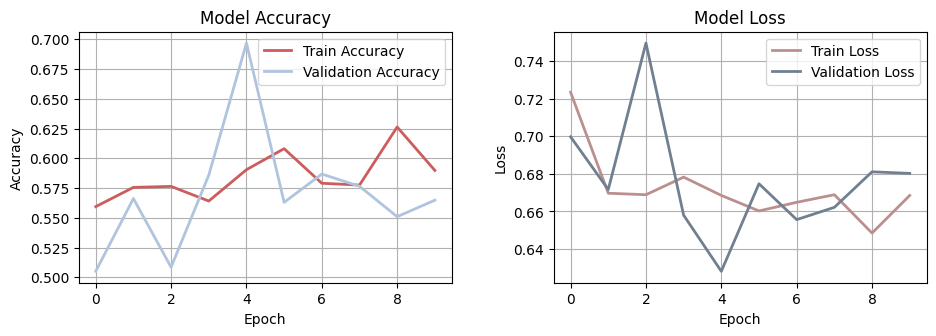

In [62]:
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first graph (Model Accuracy)
axs[0].plot(history.history['accuracy'], label='Train Accuracy', color='indianred', linewidth=2)
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='lightsteelblue', linewidth=2)
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Plot the second graph (Model Loss)
axs[1].plot(history.history['loss'], label='Train Loss', color='rosybrown', linewidth=2)
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='slategrey', linewidth=2)
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')
axs[1].grid(True)

# Adjust spacing between subplots
plt.tight_layout(pad=3.0)

# Show the plots
plt.show()


In [63]:
score = RNN_model.evaluate(X_test, y_test, verbose=1)
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

465/465 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5658 - loss: 0.6801
Test Score: 0.6802606582641602
Test Accuracy: 0.5647730827331543


### LSTM

In [65]:
# Define the model
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
lstm_model.add(SpatialDropout1D(0.5))
lstm_model.add(LSTM(5, return_sequences=False))
lstm_model.add(Dropout(0.5))
lstm_model.add(BatchNormalization())


lstm_model.add(Dense(1, activation='sigmoid'))

# Summarize the model
lstm_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_5                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = lstm_model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 40s 136ms/step - accuracy: 0.5438 - loss: 0.7103 - val_accuracy: 0.8194 - val_loss: 0.5026
Epoch 2/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 41s 149ms/step - accuracy: 0.8228 - loss: 0.4538 - val_accuracy: 0.8189 - val_loss: 0.4412
Epoch 3/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 42s 153ms/step - accuracy: 0.8699 - loss: 0.3779 - val_accuracy: 0.8440 - val_loss: 0.4139
Epoch 4/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 40s 147ms/step - accuracy: 0.8884 - loss: 0.3451 - val_accuracy: 0.8516 - val_loss: 0.4231
Epoch 5/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 37s 135ms/step - accuracy: 0.9021 - loss: 0.3178 - val_accuracy: 0.8608 - val_loss: 0.3806
Epoch 6/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 37s 136ms/step - accuracy: 0.9140 - loss: 0.2794 - val_accuracy: 0.7790 - val_loss: 0.5680
Epoch 7/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 44s 162ms/step - accuracy: 0.8911 - loss: 0.3221 - val_accuracy: 0.8641 - val_loss: 0.3867
Epoch 8/10
272/272 ━━━━━━━━━━━━━━━━━━━━ 45s 164ms/step - accuracy: 0.9187 - loss: 0

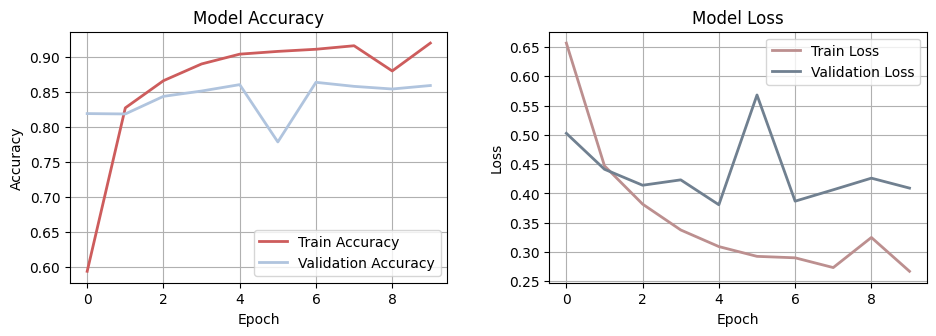

In [67]:
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first graph (Model Accuracy)
axs[0].plot(history.history['accuracy'], label='Train Accuracy', color='indianred', linewidth=2)
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='lightsteelblue', linewidth=2)
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Plot the second graph (Model Loss)
axs[1].plot(history.history['loss'], label='Train Loss', color='rosybrown', linewidth=2)
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='slategrey', linewidth=2)
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')
axs[1].grid(True)

# Adjust spacing between subplots
plt.tight_layout(pad=3.0)

# Show the plots
plt.show()


In [68]:
score = lstm_model.evaluate(X_test, y_test, verbose=1)
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

465/465 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8602 - loss: 0.4080
Test Score: 0.40899741649627686
Test Accuracy: 0.8594958186149597


### GRU

In [69]:
# Define the model
from keras.layers import GRU

GRU_model = Sequential()
GRU_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100))
GRU_model.add(SpatialDropout1D(0.5))
GRU_model.add(GRU(5, return_sequences=False))
GRU_model.add(Dropout(0.5))
#GRU_model.add(BatchNormalization())


GRU_model.add(Dense(1, activation='sigmoid'))

# Summarize the model
GRU_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_6                  │ ?                           │     0 (unbuilt) │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
GRU_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = GRU_model.fit(X_train, y_train, epochs=5, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 24s 157ms/step - accuracy: 0.5236 - loss: 0.6908 - val_accuracy: 0.5876 - val_loss: 0.6701
Epoch 2/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 22s 162ms/step - accuracy: 0.6594 - loss: 0.6176 - val_accuracy: 0.8362 - val_loss: 0.4091
Epoch 3/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 23s 166ms/step - accuracy: 0.8466 - loss: 0.4211 - val_accuracy: 0.8530 - val_loss: 0.3784
Epoch 4/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 23s 169ms/step - accuracy: 0.8866 - loss: 0.3359 - val_accuracy: 0.8603 - val_loss: 0.3568
Epoch 5/5
136/136 ━━━━━━━━━━━━━━━━━━━━ 26s 188ms/step - accuracy: 0.9150 - loss: 0.2669 - val_accuracy: 0.8649 - val_loss: 0.3462


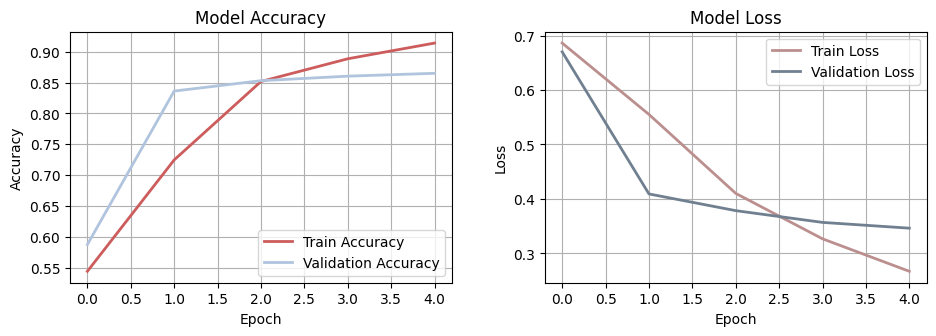

In [71]:
# Create a figure and a grid of subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first graph (Model Accuracy)
axs[0].plot(history.history['accuracy'], label='Train Accuracy', color='indianred', linewidth=2)
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='lightsteelblue', linewidth=2)
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Plot the second graph (Model Loss)
axs[1].plot(history.history['loss'], label='Train Loss', color='rosybrown', linewidth=2)
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='slategrey', linewidth=2)
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')
axs[1].grid(True)

# Adjust spacing between subplots
plt.tight_layout(pad=3.0)

# Show the plots
plt.show()


In [72]:
score = GRU_model.evaluate(X_test, y_test, verbose=1)
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

465/465 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8667 - loss: 0.3408
Test Score: 0.34624597430229187
Test Accuracy: 0.8649411797523499


## Evaluation & Comparaison

### CNN

In [78]:
from sklearn.metrics import accuracy_score

cnn_pred = cnn_model.predict(X_test)
cnn_pred = (cnn_pred > 0.5).astype('int')
CNN_Accuracy = accuracy_score(cnn_pred,y_test)*100
print("LSTM_Accuracy Score is :",CNN_Accuracy,'%')

465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
LSTM_Accuracy Score is : 83.30756302521009 %


In [80]:
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, cnn_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

report_df_filtered = report_df.loc[['macro avg'], ['precision', 'recall', 'f1-score']]
report_df_filtered


precision    recall  f1-score
macro avg   0.838351  0.833273  0.832479

### LSTM

In [74]:
from sklearn.metrics import accuracy_score

lstm_pred = lstm_model.predict(X_test)
lstm_pred = (lstm_pred > 0.5).astype('int')
LSTM_Accuracy = accuracy_score(lstm_pred,y_test)*100
print("LSTM_Accuracy Score is :",LSTM_Accuracy,'%')

465/465 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step
LSTM_Accuracy Score is : 85.94957983193278 %


In [77]:
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, lstm_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

report_df_filtered = report_df.loc[['macro avg'], ['precision', 'recall', 'f1-score']]
report_df_filtered


precision    recall  f1-score
macro avg    0.86038  0.859574  0.859427

### Bidirectional RNN

In [82]:
from sklearn.metrics import accuracy_score

BiRNN_pred = RNN_model.predict(X_test)
BiRNN_pred = (BiRNN_pred > 0.5).astype('int')
RNN_Accuracy = accuracy_score(BiRNN_pred,y_test)*100
print("LSTM_Accuracy Score is :",RNN_Accuracy,'%')

465/465 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step
LSTM_Accuracy Score is : 56.47731092436975 %


In [83]:
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, BiRNN_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

report_df_filtered = report_df.loc[['macro avg'], ['precision', 'recall', 'f1-score']]
report_df_filtered


precision    recall  f1-score
macro avg   0.596581  0.563854  0.524011

### GRU

In [84]:
from sklearn.metrics import accuracy_score

GRU_pred = GRU_model.predict(X_test)
GRU_pred = (GRU_pred > 0.5).astype('int')
GRU_Accuracy = accuracy_score(GRU_pred,y_test)*100
print("LSTM_Accuracy Score is :",GRU_Accuracy,'%')

465/465 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step
LSTM_Accuracy Score is : 86.49411764705881 %


In [85]:
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, GRU_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

report_df_filtered = report_df.loc[['macro avg'], ['precision', 'recall', 'f1-score']]
report_df_filtered


precision    recall  f1-score
macro avg   0.865494  0.865003  0.864903

In [89]:
data = {
    'Model': ['CNN','Bidirectional RNN', 'LSTM', 'GRU'],
    'Accuracy': [CNN_Accuracy,RNN_Accuracy, LSTM_Accuracy, GRU_Accuracy]
}
Acc_df = pd.DataFrame(data)

In [91]:
Acc_df

Model   Accuracy
0                CNN  83.307563
1  Bidirectional RNN  56.477311
2               LSTM  85.949580
3                GRU  86.494118

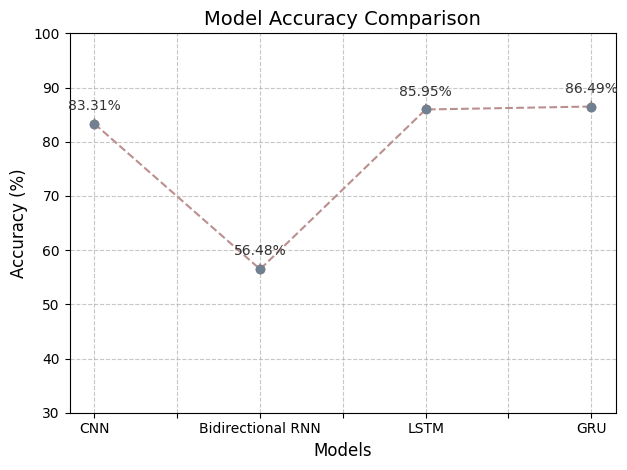

In [98]:
ax = Acc_df.plot(x='Model', y='Accuracy', marker='o', linestyle='dashed', color='rosybrown', legend=False)

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=12)
ax.set_title('Model Accuracy Comparison', fontsize=14)
ax.set_ylim(30, 100)  # Set the y-axis limits for percentage values
ax.grid(True, linestyle='--', alpha=0.7)  # Add grid with custom style

for i, accuracy in enumerate(Acc_df['Accuracy']):
    ax.annotate(f'{accuracy:.2f}%', xy=(i, accuracy), xytext=(i, accuracy + 2),
                ha='center', va='bottom', fontsize=10, color='#333333',
                arrowprops=dict(arrowstyle='-', color='gray'))
    ax.plot(i, accuracy, 'o', color='slategrey')  # Highlight points with custom color

plt.tight_layout()
plt.show()


## Interprétation

### LIME

In [104]:
# Example code for LIME
from lime.lime_tabular import LimeTabularExplainer

# Création de l'explainer
explainer = LimeTabularExplainer(X_train, mode="regression")

# Choisir un exemple spécifique à expliquer
i = 0  # index de l'exemple à expliquer
explanation = explainer.explain_instance(X_test[i], GRU_model.predict)

# Affichage de l'explication
explanation.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step


In [118]:
# Example code for LIME
from lime.lime_tabular import LimeTabularExplainer

# Création de l'explainer
explainer = LimeTabularExplainer(X_train, mode="regression")

# Choisir un exemple spécifique à expliquer
i = 0  # index de l'exemple à expliquer
explanation = explainer.explain_instance(X_test[i], lstm_model.predict)

# Affichage de l'explication
explanation.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


In [119]:
# Example code for LIME
from lime.lime_tabular import LimeTabularExplainer

# Création de l'explainer
explainer = LimeTabularExplainer(X_train, mode="regression")

# Choisir un exemple spécifique à expliquer
i = 0  # index de l'exemple à expliquer
explanation = explainer.explain_instance(X_test[i], RNN_model.predict)

# Affichage de l'explication
explanation.show_in_notebook(show_table=True)


157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step


In [110]:
import shap
explainer = shap.Explainer(cnn_model.predict, X_train[:50])  # Use a small sample for background data
shap_values = explainer.shap_values(X_test[:50])

314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


PermutationExplainer explainer:   2%|█▏                                                         | 1/50 [00:00<?, ?it/s]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:   6%|███                                                | 3/50 [00:35<07:01,  8.98s/it]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


PermutationExplainer explainer:   8%|████                                               | 4/50 [00:55<10:10, 13.28s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  10%|█████                                              | 5/50 [01:13<11:30, 15.35s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  12%|██████                                             | 6/50 [01:33<12:22, 16.88s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  14%|███████▏                                           | 7/50 [01:51<12:21, 17.25s/it]

285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  16%|████████▏                                          | 8/50 [02:08<11:57, 17.09s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  18%|█████████▏                                         | 9/50 [02:27<12:00, 17.56s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  20%|██████████                                        | 10/50 [02:44<11:44, 17.61s/it]

249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  22%|███████████                                       | 11/50 [03:01<11:18, 17.41s/it]

247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


PermutationExplainer explainer:  24%|████████████                                      | 12/50 [03:24<12:05, 19.10s/it]

275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  26%|█████████████                                     | 13/50 [03:43<11:40, 18.93s/it]

275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


PermutationExplainer explainer:  28%|██████████████                                    | 14/50 [04:00<11:01, 18.37s/it]

285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


PermutationExplainer explainer:  30%|███████████████                                   | 15/50 [04:19<10:51, 18.62s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  32%|████████████████                                  | 16/50 [04:37<10:23, 18.34s/it]

281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  34%|█████████████████                                 | 17/50 [04:53<09:41, 17.64s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  36%|██████████████████                                | 18/50 [05:12<09:36, 18.02s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  38%|███████████████████                               | 19/50 [05:30<09:25, 18.26s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  40%|████████████████████                              | 20/50 [05:51<09:31, 19.06s/it]

292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  42%|█████████████████████                             | 21/50 [06:11<09:21, 19.35s/it]

268/268 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


PermutationExplainer explainer:  44%|██████████████████████                            | 22/50 [06:30<08:58, 19.22s/it]

260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


PermutationExplainer explainer:  46%|███████████████████████                           | 23/50 [06:46<08:11, 18.20s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  48%|████████████████████████                          | 24/50 [07:04<07:53, 18.20s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  50%|█████████████████████████                         | 25/50 [07:24<07:45, 18.61s/it]

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


PermutationExplainer explainer:  52%|██████████████████████████                        | 26/50 [07:45<07:44, 19.34s/it]

248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  54%|███████████████████████████                       | 27/50 [08:02<07:10, 18.72s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  56%|████████████████████████████                      | 28/50 [08:20<06:45, 18.45s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  58%|████████████████████████████▉                     | 29/50 [08:39<06:29, 18.56s/it]

240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  60%|██████████████████████████████                    | 30/50 [08:53<05:45, 17.30s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  62%|███████████████████████████████                   | 31/50 [09:10<05:28, 17.30s/it]

310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  64%|████████████████████████████████                  | 32/50 [09:29<05:16, 17.56s/it]

270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


PermutationExplainer explainer:  66%|█████████████████████████████████                 | 33/50 [09:45<04:52, 17.23s/it]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  68%|██████████████████████████████████                | 34/50 [10:05<04:47, 17.99s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  70%|███████████████████████████████████               | 35/50 [10:24<04:33, 18.22s/it]

266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  72%|████████████████████████████████████              | 36/50 [10:41<04:12, 18.04s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  74%|█████████████████████████████████████             | 37/50 [11:00<03:57, 18.28s/it]

240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step


PermutationExplainer explainer:  76%|██████████████████████████████████████            | 38/50 [11:17<03:33, 17.81s/it]

243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  78%|███████████████████████████████████████           | 39/50 [11:32<03:06, 16.91s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  80%|████████████████████████████████████████          | 40/50 [11:49<02:50, 17.09s/it]

304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  82%|█████████████████████████████████████████         | 41/50 [12:08<02:39, 17.69s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  84%|██████████████████████████████████████████        | 42/50 [12:26<02:21, 17.70s/it]

250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  86%|███████████████████████████████████████████       | 43/50 [12:40<01:56, 16.68s/it]

293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  88%|████████████████████████████████████████████      | 44/50 [12:57<01:39, 16.58s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  90%|█████████████████████████████████████████████     | 45/50 [13:13<01:23, 16.68s/it]

276/276 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  92%|██████████████████████████████████████████████    | 46/50 [13:30<01:05, 16.49s/it]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer:  94%|███████████████████████████████████████████████   | 47/50 [13:46<00:49, 16.59s/it]

254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  96%|████████████████████████████████████████████████  | 48/50 [14:03<00:33, 16.52s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer:  98%|█████████████████████████████████████████████████ | 49/50 [14:23<00:17, 17.54s/it]

284/284 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
284/284 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
284/284 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
284/284 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


PermutationExplainer explainer: 100%|██████████████████████████████████████████████████| 50/50 [14:39<00:00, 17.20s/it]

303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
303/303 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
303/303 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
303/303 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


PermutationExplainer explainer: 51it [14:57, 17.95s/it]                                                                


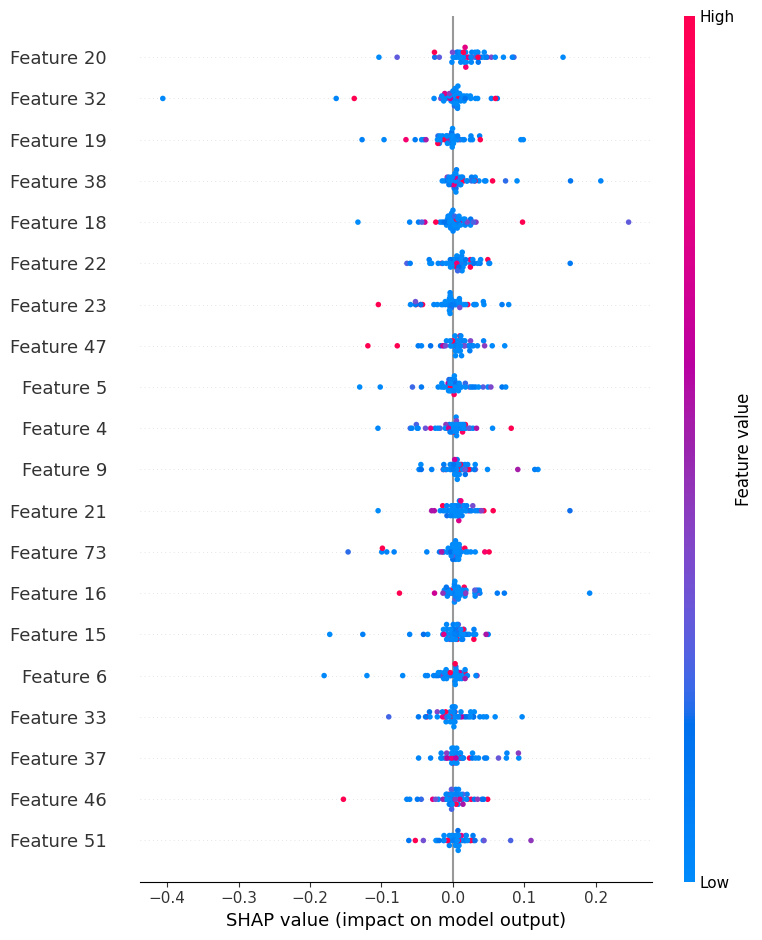

In [112]:
shap.summary_plot(shap_values, X_test[:50])

In [113]:
explainer = shap.Explainer(GRU_model.predict, X_train[:50])  # Use a small sample for background data
shap_values = explainer.shap_values(X_test[:50])

314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step


PermutationExplainer explainer:   2%|█▏                                                         | 1/50 [00:00<?, ?it/s]

314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


PermutationExplainer explainer:   6%|███                                                | 3/50 [01:17<16:08, 20.60s/it]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step


PermutationExplainer explainer:   8%|████                                               | 4/50 [01:59<22:24, 29.24s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  10%|█████                                              | 5/50 [02:41<25:32, 34.05s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step


PermutationExplainer explainer:  12%|██████                                             | 6/50 [03:28<28:16, 38.55s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step


PermutationExplainer explainer:  14%|███████▏                                           | 7/50 [04:11<28:45, 40.12s/it]

285/285 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


PermutationExplainer explainer:  16%|████████▏                                          | 8/50 [04:50<27:41, 39.57s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  18%|█████████▏                                         | 9/50 [05:27<26:39, 39.02s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


PermutationExplainer explainer:  20%|██████████                                        | 10/50 [06:07<26:09, 39.25s/it]

249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  22%|███████████                                       | 11/50 [06:38<23:50, 36.68s/it]

247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


PermutationExplainer explainer:  24%|████████████                                      | 12/50 [07:10<22:17, 35.19s/it]

275/275 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step


PermutationExplainer explainer:  26%|█████████████                                     | 13/50 [07:46<21:56, 35.57s/it]

275/275 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


PermutationExplainer explainer:  28%|██████████████                                    | 14/50 [08:22<21:17, 35.49s/it]

285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step


PermutationExplainer explainer:  30%|███████████████                                   | 15/50 [08:57<20:41, 35.48s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


PermutationExplainer explainer:  32%|████████████████                                  | 16/50 [09:38<20:59, 37.03s/it]

281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step


PermutationExplainer explainer:  34%|█████████████████                                 | 17/50 [10:14<20:17, 36.90s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step


PermutationExplainer explainer:  36%|██████████████████                                | 18/50 [10:55<20:18, 38.09s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  38%|███████████████████                               | 19/50 [11:34<19:51, 38.45s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


PermutationExplainer explainer:  40%|████████████████████                              | 20/50 [12:12<19:05, 38.19s/it]

292/292 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step


PermutationExplainer explainer:  42%|█████████████████████                             | 21/50 [12:51<18:34, 38.42s/it]

268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  44%|██████████████████████                            | 22/50 [13:27<17:32, 37.60s/it]

260/260 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
260/260 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
148/148 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  46%|███████████████████████                           | 23/50 [13:58<16:08, 35.86s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  48%|████████████████████████                          | 24/50 [14:36<15:44, 36.32s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


PermutationExplainer explainer:  50%|█████████████████████████                         | 25/50 [15:13<15:11, 36.46s/it]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


PermutationExplainer explainer:  52%|██████████████████████████                        | 26/50 [15:54<15:12, 38.02s/it]

248/248 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step


PermutationExplainer explainer:  54%|███████████████████████████                       | 27/50 [16:27<14:00, 36.55s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step


PermutationExplainer explainer:  56%|████████████████████████████                      | 28/50 [17:13<14:21, 39.14s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  58%|████████████████████████████▉                     | 29/50 [17:55<14:00, 40.01s/it]

240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step
138/138 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step


PermutationExplainer explainer:  60%|██████████████████████████████                    | 30/50 [18:32<13:02, 39.12s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  62%|███████████████████████████████                   | 31/50 [19:10<12:20, 38.99s/it]

310/310 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
310/310 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
310/310 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
310/310 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step


PermutationExplainer explainer:  64%|████████████████████████████████                  | 32/50 [19:50<11:47, 39.28s/it]

270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  66%|█████████████████████████████████                 | 33/50 [20:27<10:53, 38.44s/it]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step


PermutationExplainer explainer:  68%|██████████████████████████████████                | 34/50 [21:07<10:21, 38.84s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


PermutationExplainer explainer:  70%|███████████████████████████████████               | 35/50 [21:52<10:12, 40.82s/it]

266/266 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step
266/266 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step
266/266 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step
266/266 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step


PermutationExplainer explainer:  72%|████████████████████████████████████              | 36/50 [22:32<09:27, 40.55s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step


PermutationExplainer explainer:  74%|█████████████████████████████████████             | 37/50 [23:14<08:54, 41.13s/it]

240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


PermutationExplainer explainer:  76%|██████████████████████████████████████            | 38/50 [23:45<07:36, 38.02s/it]

243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


PermutationExplainer explainer:  78%|███████████████████████████████████████           | 39/50 [24:16<06:33, 35.79s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


PermutationExplainer explainer:  80%|████████████████████████████████████████          | 40/50 [24:56<06:12, 37.22s/it]

304/304 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


PermutationExplainer explainer:  82%|█████████████████████████████████████████         | 41/50 [25:35<05:37, 37.55s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step


PermutationExplainer explainer:  84%|██████████████████████████████████████████        | 42/50 [26:14<05:04, 38.12s/it]

250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step


PermutationExplainer explainer:  86%|███████████████████████████████████████████       | 43/50 [26:50<04:23, 37.58s/it]

293/293 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step


PermutationExplainer explainer:  88%|████████████████████████████████████████████      | 44/50 [27:32<03:52, 38.67s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


PermutationExplainer explainer:  90%|█████████████████████████████████████████████     | 45/50 [28:16<03:21, 40.34s/it]

276/276 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step


PermutationExplainer explainer:  92%|██████████████████████████████████████████████    | 46/50 [28:55<02:39, 39.88s/it]

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step


PermutationExplainer explainer:  94%|███████████████████████████████████████████████   | 47/50 [29:41<02:04, 41.65s/it]

254/254 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


PermutationExplainer explainer:  96%|████████████████████████████████████████████████  | 48/50 [30:17<01:20, 40.14s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step


PermutationExplainer explainer:  98%|█████████████████████████████████████████████████ | 49/50 [30:59<00:40, 40.69s/it]

284/284 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
284/284 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
284/284 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
284/284 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


PermutationExplainer explainer: 100%|██████████████████████████████████████████████████| 50/50 [31:35<00:00, 39.25s/it]

303/303 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
303/303 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
303/303 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step
303/303 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step


PermutationExplainer explainer: 51it [32:14, 38.68s/it]                                                                


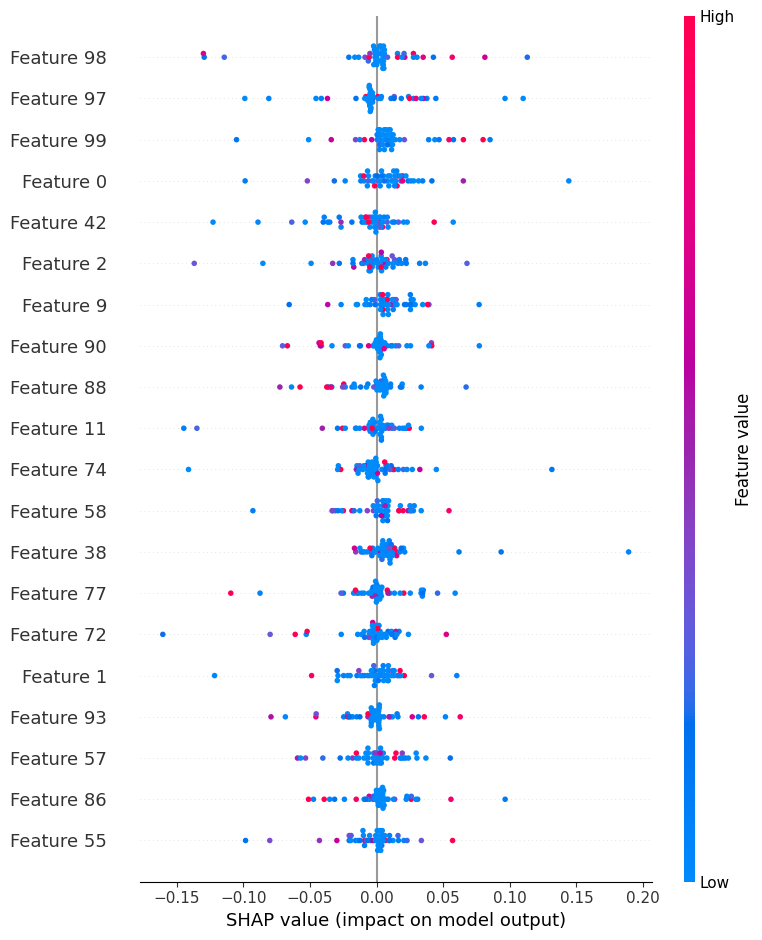

In [114]:
shap.summary_plot(shap_values, X_test[:50])

In [115]:
explainer = shap.Explainer(lstm_model.predict, X_train[:50])  # Use a small sample for background data
shap_values = explainer.shap_values(X_test[:50])

314/314 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


PermutationExplainer explainer:   2%|█▏                                                         | 1/50 [00:00<?, ?it/s]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


PermutationExplainer explainer:   6%|███                                                | 3/50 [01:08<13:17, 16.96s/it]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


PermutationExplainer explainer:   8%|████                                               | 4/50 [01:43<18:52, 24.63s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


PermutationExplainer explainer:  10%|█████                                              | 5/50 [02:17<20:55, 27.90s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


PermutationExplainer explainer:  12%|██████                                             | 6/50 [02:49<21:40, 29.55s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


PermutationExplainer explainer:  14%|███████▏                                           | 7/50 [03:26<22:55, 31.99s/it]

285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  16%|████████▏                                          | 8/50 [03:59<22:37, 32.32s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


PermutationExplainer explainer:  18%|█████████▏                                         | 9/50 [04:33<22:16, 32.60s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


PermutationExplainer explainer:  20%|██████████                                        | 10/50 [05:10<22:43, 34.08s/it]

249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
143/143 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


PermutationExplainer explainer:  22%|███████████                                       | 11/50 [05:40<21:23, 32.91s/it]

247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
247/247 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


PermutationExplainer explainer:  24%|████████████                                      | 12/50 [06:10<20:15, 31.99s/it]

275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  26%|█████████████                                     | 13/50 [06:42<19:44, 32.00s/it]

275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


PermutationExplainer explainer:  28%|██████████████                                    | 14/50 [07:13<18:56, 31.56s/it]

285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
285/285 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


PermutationExplainer explainer:  30%|███████████████                                   | 15/50 [07:45<18:30, 31.74s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


PermutationExplainer explainer:  32%|████████████████                                  | 16/50 [08:18<18:11, 32.11s/it]

281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


PermutationExplainer explainer:  34%|█████████████████                                 | 17/50 [08:52<17:58, 32.69s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


PermutationExplainer explainer:  36%|██████████████████                                | 18/50 [09:29<18:05, 33.92s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


PermutationExplainer explainer:  38%|███████████████████                               | 19/50 [10:04<17:41, 34.24s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


PermutationExplainer explainer:  40%|████████████████████                              | 20/50 [10:42<17:43, 35.46s/it]

292/292 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
292/292 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step


PermutationExplainer explainer:  42%|█████████████████████                             | 21/50 [11:18<17:15, 35.71s/it]

268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
268/268 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


PermutationExplainer explainer:  44%|██████████████████████                            | 22/50 [11:53<16:31, 35.42s/it]

260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
260/260 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


PermutationExplainer explainer:  46%|███████████████████████                           | 23/50 [12:25<15:27, 34.35s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step


PermutationExplainer explainer:  48%|████████████████████████                          | 24/50 [13:05<15:39, 36.12s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


PermutationExplainer explainer:  50%|█████████████████████████                         | 25/50 [13:42<15:06, 36.26s/it]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step


PermutationExplainer explainer:  52%|██████████████████████████                        | 26/50 [14:21<14:52, 37.20s/it]

248/248 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step
248/248 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step


PermutationExplainer explainer:  54%|███████████████████████████                       | 27/50 [14:57<14:08, 36.91s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


PermutationExplainer explainer:  56%|████████████████████████████                      | 28/50 [15:40<14:12, 38.73s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


PermutationExplainer explainer:  58%|████████████████████████████▉                     | 29/50 [16:18<13:24, 38.30s/it]

240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


PermutationExplainer explainer:  60%|██████████████████████████████                    | 30/50 [16:46<11:45, 35.25s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step


PermutationExplainer explainer:  62%|███████████████████████████████                   | 31/50 [17:22<11:14, 35.49s/it]

310/310 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
310/310 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
310/310 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
310/310 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


PermutationExplainer explainer:  64%|████████████████████████████████                  | 32/50 [17:57<10:35, 35.31s/it]

270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step
151/151 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


PermutationExplainer explainer:  66%|█████████████████████████████████                 | 33/50 [18:25<09:26, 33.35s/it]

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


PermutationExplainer explainer:  68%|██████████████████████████████████                | 34/50 [19:00<08:58, 33.67s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


PermutationExplainer explainer:  70%|███████████████████████████████████               | 35/50 [19:34<08:28, 33.90s/it]

266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step
266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
266/266 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


PermutationExplainer explainer:  72%|████████████████████████████████████              | 36/50 [20:03<07:32, 32.31s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step


PermutationExplainer explainer:  74%|█████████████████████████████████████             | 37/50 [20:39<07:13, 33.38s/it]

240/240 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step


PermutationExplainer explainer:  76%|██████████████████████████████████████            | 38/50 [21:08<06:26, 32.20s/it]

243/243 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
243/243 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  78%|███████████████████████████████████████           | 39/50 [21:39<05:49, 31.80s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


PermutationExplainer explainer:  80%|████████████████████████████████████████          | 40/50 [22:12<05:21, 32.12s/it]

304/304 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step


PermutationExplainer explainer:  82%|█████████████████████████████████████████         | 41/50 [22:46<04:53, 32.59s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  84%|██████████████████████████████████████████        | 42/50 [23:21<04:28, 33.53s/it]

250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  86%|███████████████████████████████████████████       | 43/50 [23:52<03:48, 32.67s/it]

293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  88%|████████████████████████████████████████████      | 44/50 [24:26<03:18, 33.15s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


PermutationExplainer explainer:  90%|█████████████████████████████████████████████     | 45/50 [25:01<02:47, 33.56s/it]

276/276 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
276/276 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step


PermutationExplainer explainer:  92%|██████████████████████████████████████████████    | 46/50 [25:38<02:18, 34.75s/it]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


PermutationExplainer explainer:  94%|███████████████████████████████████████████████   | 47/50 [26:16<01:47, 35.73s/it]

254/254 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step
145/145 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step


PermutationExplainer explainer:  96%|████████████████████████████████████████████████  | 48/50 [26:49<01:09, 34.95s/it]

314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
314/314 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
158/158 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step


PermutationExplainer explainer:  98%|█████████████████████████████████████████████████ | 49/50 [27:30<00:36, 36.65s/it]

284/284 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step
284/284 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
284/284 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
284/284 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step


PermutationExplainer explainer: 100%|██████████████████████████████████████████████████| 50/50 [28:04<00:00, 35.78s/it]

303/303 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step
303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step
303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
303/303 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step


PermutationExplainer explainer: 51it [28:38, 34.36s/it]                                                                


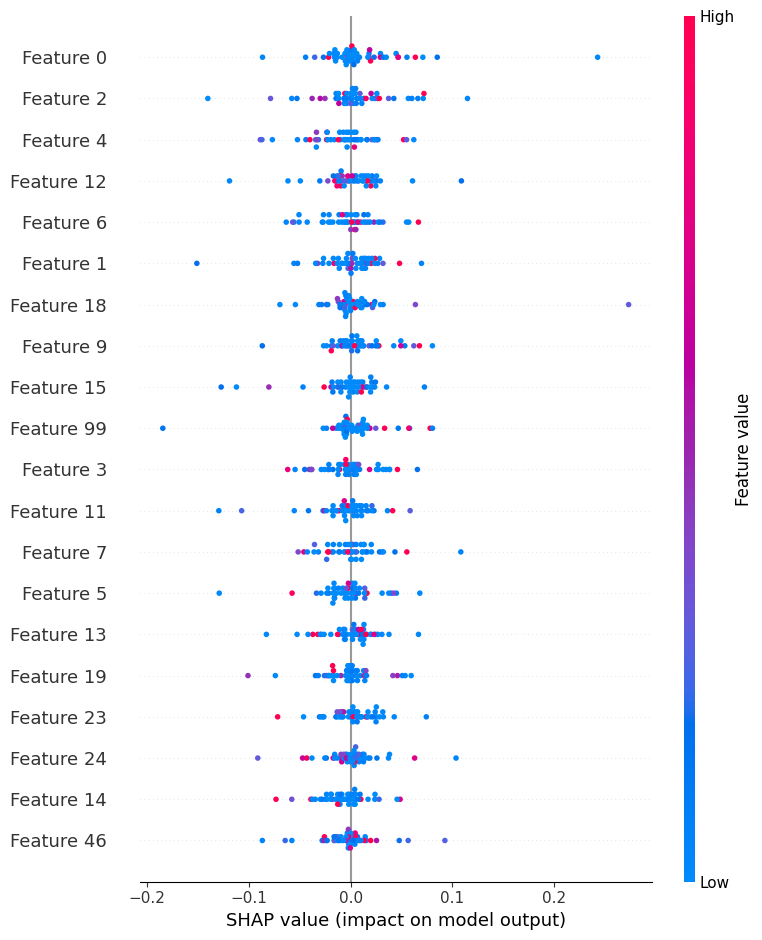

In [116]:
shap.summary_plot(shap_values, X_test[:50])